# 🚀 Artificial Intelligence - 2025 | Week 11 (Generative AI)
*Unlock the Future with Intelligent Machines* 🤖✨

- **Author:** Teerapong Panboonyuen (also known as Kao Panboonyuen)
- **GitHub:** [kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1](https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1)

# Install & Setup (run first cell)

In [ ]:
# 🎨🤖 Generative AI Playground in Colab
# Prepared for students of Dr. Kao Panboonyuen
# Let's get inspired with AI that can CREATE! 🚀✨

!pip install -q transformers diffusers accelerate safetensors sentencepiece datasets
!pip install -q torch torchvision torchaudio
!pip install -q pillow

from IPython.display import Image, display
import torch

# 🖼️ Text ➡️ Image (Stable Diffusion)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

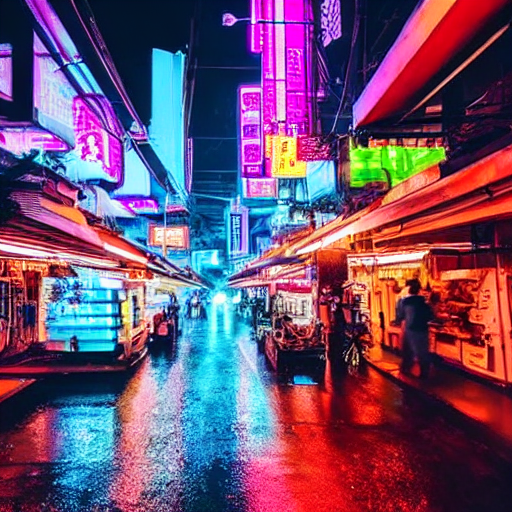

In [ ]:
from diffusers import StableDiffusionPipeline

model_id = "YOUR_DEV_NAME/YOUR_GENAI_MODEL_NAME"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "A futuristic city in Thailand, neon lights, cyberpunk style 🌃🌸"
image = pipe(prompt).images[0]

display(image)

Fine-tuning a Stable Diffusion model like `runwayml/stable-diffusion-v1-5` requires multiple steps, including preparing your dataset, setting up the training pipeline (using 🧨 Diffusers and 🤗 Transformers/Accelerate), and saving your fine-tuned model.

Let’s walk through a **sample end-to-end pipeline** using 🧨 Hugging Face's `diffusers` library. We'll use **DreamBooth**, a popular fine-tuning method that allows the model to learn a new concept (like a person, style, or object) with relatively few images.

---

### 🚀 Sample: Fine-tuning Stable Diffusion with DreamBooth

---

### 1. **Environment Setup**

Install required packages:

```bash
pip install diffusers[torch] transformers accelerate safetensors
pip install datasets
```

(Optional for better performance)

```bash
pip install xformers
```

---

### 2. **Prepare Your Dataset**

Create a folder structure like this:

```
my_dreambooth_data/
├── concept_images/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── captions/
    ├── image1.txt
    ├── image2.txt
    └── ...
```

Each `.txt` file should contain a prompt that describes the image, using a unique token for your concept. For example:

```
a photo of sks_person in Thailand
```

Where `sks_person` is your custom token.

---

### 3. **Run the Training**

Use Hugging Face's DreamBooth training script:

#### Option 1: Use `diffusers` CLI

You can use the official Hugging Face training script directly:

```bash
accelerate config
```

Then run:

```bash
accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --instance_data_dir="my_dreambooth_data/concept_images" \
  --output_dir="my_finetuned_sd_model" \
  --instance_prompt="a photo of sks_person in Thailand" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=800 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --checkpointing_steps=100 \
  --enable_xformers_memory_efficient_attention
```

* `instance_prompt` is the prompt used for training.
* `output_dir` is where your fine-tuned model will be saved.

📌 You can find the script here:
[DreamBooth Training Script](https://github.com/huggingface/diffusers/blob/main/examples/dreambooth/train_dreambooth.py)

You can download it with:

```bash
wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth.py
```

---

### 4. **Using the Fine-Tuned Model**

After training, you can load your model like this:

```python
from diffusers import StableDiffusionPipeline
import torch

model_path = "my_finetuned_sd_model"

pipe = StableDiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16
).to("cuda")

prompt = "a photo of sks_person in Thailand, neon lights, cyberpunk style"
image = pipe(prompt).images[0]

image.show()
```

---

### 5. **Optional: Push to Hugging Face Hub**

```bash
huggingface-cli login
```

Then:

```python
pipe.push_to_hub("your-username/my-finetuned-sd-model")
```

---

### 🧠 Tips

* For unique styles, places, or objects, 10–30 images may be enough.
* Use a unique token like `sks_person`, `xyz_style` to avoid polluting existing concepts.
* If training with more general styles or concepts, consider using **LoRA** (a lighter fine-tuning method).

---


# 🔄 Image ➡️ Image (Style Transfer with Diffusion)

In [ ]:
!wget https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/face/Barack_Obama_Sample_Face.png -O obama.png >> log.txt

--2025-09-12 10:55:20--  https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/face/Barack_Obama_Sample_Face.png
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/face/Barack_Obama_Sample_Face.png [following]
--2025-09-12 10:55:20--  https://raw.githubusercontent.com/kaopanboonyuen/panboonyuen_dataset/main/public_dataset/face/Barack_Obama_Sample_Face.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 803500 (785K) [image/png]
Saving to: ‘obama.png’

obama.png           100%[===================>] 784.67K  --.-KB/s  

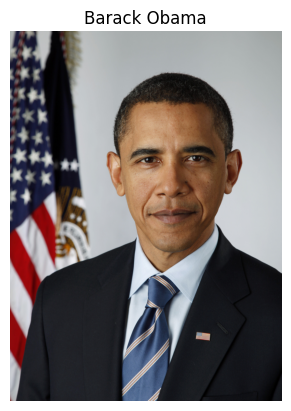

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open("obama.png")

# Display it
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Barack Obama")
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

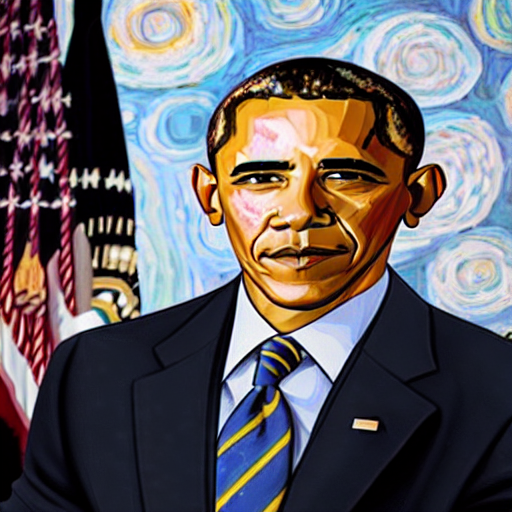

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

pipe_img2img = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

init_image = Image.open("obama.png").convert("RGB").resize((512,512))

prompt = # TAKE_YOUR_PROMPT_HERE
images = pipe_img2img(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

display(images[0])

If you want to **fine-tune it** (so that it better understands how to turn images like `obama.png` into something like *"Van Gogh Starry Night Obama"*), you'll need to fine-tune the **underlying text-to-image model** that powers both `StableDiffusionPipeline` and `StableDiffusionImg2ImgPipeline`.

There is **no separate fine-tuning method** for `img2img` — instead, you:

### ✅ Fine-tune the base model (e.g., `runwayml/stable-diffusion-v1-5`)

Then, after training, use the **same code** you posted, just swap in your new model.

---

## 🔁 Summary of Steps for Img2Img Fine-Tuning

---

### 1. **Prepare Data (Image & Prompt Pairs)**

Since you’re working with **img2img**, your dataset will look like:

```
my_img2img_dataset/
├── instance_images/
│   ├── obama.png
│   ├── obama2.png
│   └── ...
├── style_images/
│   ├── obama_starry.png
│   ├── obama2_starry.png
│   └── ...
└── captions/
    ├── obama.txt      → "a painting of sks_obama in Van Gogh style"
    └── ...
```

You can train using **image pairs** (input + target) if you're doing **pixel-level supervision**, like ControlNet or Pix2Pix.

But for most use cases (like DreamBooth), you just use the **target image** (styled) and a prompt describing it.

---

### 2. **Train Using DreamBooth or LoRA (recommended)**

Use the same training command (see previous message), but change:

* Use the **styled image** as input (e.g., `obama_starry.png`)
* Caption it like:
  `"a painting of sks_obama in Van Gogh style"`

> Note: This teaches the model to associate `sks_obama` with Obama’s likeness, and `Van Gogh style` with the art style.

### Example Prompt:

```bash
--instance_prompt="a painting of sks_obama in Van Gogh style"
```

---

### 3. **Load the Fine-Tuned Model into Img2Img Pipeline**

Once your model is trained, do this:

```python
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import torch

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "my_finetuned_model", torch_dtype=torch.float16
).to("cuda")

init_image = Image.open("obama.png").convert("RGB").resize((512, 512))

prompt = "a painting of sks_obama in Van Gogh style 🌌🖌️"
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image.show()
```

Now it will **retain Obama’s likeness** better and **apply Van Gogh’s style** more accurately, because the model has seen this association during training.

---


# ✍️ Text ➡️ Text (Chat with GPT-2)

In [ ]:
from transformers import pipeline

generator = pipeline(YOUR_TASK_NAME, model=YOUR_GENAI_MODEL_NAME)

prompt = # TAKE_YOUR_PROMPT_HERE
result = generator(prompt, max_length=60, num_return_sequences=1)

print("🤖:", result[0]['generated_text'])

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


🤖: In the future, AI will be able to learn from its successes and failures.

"I think it's going to be really interesting," says Hagen, who is also heading the startup. "I think when it's done, it's going to be really interesting."

The company's core businesses include robotics, artificial intelligence, artificial intelligence, and analytics.

"There are a lot of different ways to make decisions that can be learned from AI," says Hagen. "There are some things that you can learn from different things, but at the end of the day you've got to make sure that you're doing it to your value."

Hagen's vision for AI is a future where the human brain has its own way to learn and develop. AI will be able to learn from its successes and failures, too, and will change the world.

"There is a huge opportunity for the human brain and for all of our species to be able to learn and evolve in a way that's fair to everyone," says Hagen. "The question is, will we be able to do that?"

For more on AI, wa

In [ ]:
from transformers import pipeline, set_seed

# Optional: for reproducibility
set_seed(42)

# Load the GPT-2 text generation pipeline
generator = pipeline(YOUR_TASK_NAME, model=YOUR_GENAI_MODEL_NAME, device=0)

# List of 5 fun and engaging prompts
funny_prompts = [
    "In the future, AI will become a stand-up comedian and",
    "My robot roommate keeps trying to",
    "One day, AI decided to quit its job and become a",
    "If AI could dream, it would probably dream about",
    "The day my smart fridge started giving me life advice"
]

# Generate responses
for i, prompt in enumerate(funny_prompts, 1):
    result = generator(
        prompt,
        max_new_tokens=60,
        do_sample=True,
        temperature=0.9,
        top_p=0.95,
        truncation=True,
        pad_token_id=50256  # Clean ending
    )
    text = result[0]["generated_text"]
    print(f"\n💡 Prompt {i}: {prompt}")
    print(f"🤖 GPT-2: {text}")

Device set to use cuda:0



💡 Prompt 1: In the future, AI will become a stand-up comedian and
🤖 GPT-2: In the future, AI will become a stand-up comedian and will take on the roles of the world's greatest comedians. It will be called 'The Greatest Comedy Show', a name most comedians will consider.

At the moment, there are five major networks that will be working on the show:

The new comedy series will be called 'The Greatest

💡 Prompt 2: My robot roommate keeps trying to
🤖 GPT-2: My robot roommate keeps trying to explain something. It's like he doesn't know what it is or what the heck he's doing."

It's not the first time he's caught using his robot companion, but he says he's always been quite happy to help.

"I love my robot roommate, and I

💡 Prompt 3: One day, AI decided to quit its job and become a
🤖 GPT-2: One day, AI decided to quit its job and become a hobby.

"The idea is to see whether you can take advantage of what's going on," says Tim Smith, a computer scientist at Microsoft who is currently studyi

## 🔁 GPT-2 Fine-Tuning Overview

### 🧱 Steps:

1. **Prepare your dataset**
2. **Tokenize it using GPT-2 tokenizer**
3. **Fine-tune GPT-2 using Trainer or custom loop**
4. **Save and load the model**

I'll walk you through a **minimal and complete fine-tuning example**.

---

## ✅ Example: Fine-tune GPT-2 on Custom Text Dataset

Let’s say you want GPT-2 to generate **funny educational quotes**.

---

### 📁 Step 1: Prepare a Text Dataset

Create a file: `funny_quotes.txt`

```txt
In the future, AI will teach math by rapping equations.
My robot teacher told me jokes instead of homework.
AI grading: "You got an A for effort, and a B for bandwidth."
Quantum computers are just moody calculators.
Teachers now ride hoverboards and hand out candy drones.
```

---

### ⚙️ Step 2: Install Dependencies

```bash
pip install transformers datasets accelerate
```

---

### 🧪 Step 3: Fine-tuning Script

Here's a complete script using `Trainer`:

```python
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, TextDataset, DataCollatorForLanguageModeling

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Make sure the tokenizer has a pad token
tokenizer.pad_token = tokenizer.eos_token

# Load your dataset
def load_dataset(file_path, tokenizer):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )

train_dataset = load_dataset("funny_quotes.txt", tokenizer)

# Data collator helps with batching
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./gpt2-finetuned-funny",
    overwrite_output_dir=True,
    per_device_train_batch_size=2,
    num_train_epochs=5,
    save_steps=500,
    save_total_limit=2,
    logging_steps=100,
    prediction_loss_only=True,
    fp16=True,  # if you have a GPU
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator
)

# Train!
trainer.train()

# Save
model.save_pretrained("./gpt2-finetuned-funny")
tokenizer.save_pretrained("./gpt2-finetuned-funny")
```

---

### 🚀 Step 4: Use Your Fine-Tuned GPT-2

```python
from transformers import pipeline

generator = pipeline("text-generation", model="./gpt2-finetuned-funny")

prompt = "In the future, AI will"
result = generator(prompt, max_new_tokens=50, do_sample=True, temperature=0.9)

print("🤖:", result[0]['generated_text'])
```

---

## 🧠 Notes:

* For bigger datasets, use `datasets` library and `Dataset` object.
* You can fine-tune on full conversations, tech support logs, jokes, or lesson plans.
* Training longer? Consider `gpt2-medium` or `gpt2-xl` with enough GPU VRAM.

---

## ✅ Optional: Upload to Hugging Face Hub

```bash
huggingface-cli login
```

```python
model.push_to_hub("your-username/gpt2-funny-quotes")
tokenizer.push_to_hub("your-username/gpt2-funny-quotes")
```

---

# 📝 Image ➡️ Text (Captioning with BLIP)

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")

raw_image = Image.open(requests.get("https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/face/Barack_Obama_Sample_Face.png", stream=True).raw).convert('RGB')

inputs = processor(raw_image, return_tensors="pt").to("cuda")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("🖼️➡️📝:", caption)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

🖼️➡️📝: a man in a suit and tie standing in front of an american flag
